In [4]:
import numpy as np
import cv2
import imutils
import easyocr
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [5]:
img_pelak = cv2.imread("D:\\10project Aiolearn\\Plaque detection\\pelak_org\\pelak_cls.jpg")
img_pelak_gray = cv2.cvtColor(img_pelak,cv2.COLOR_BGR2GRAY)
cv2.imshow("Pelak",img_pelak_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
bila_filter = cv2.bilateralFilter(img_pelak_gray,11,15,15)
edges = cv2.Canny(bila_filter,30,150)
edges = cv2.GaussianBlur(edges,(5,5),0)
cv2.imshow("Edges",edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
contuors = cv2.findContours(edges.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contuors_refind = imutils.grab_contours(contuors)
contuors_sort = sorted(contuors_refind,key=cv2.contourArea,reverse=True)

In [8]:
for coun in contuors_sort:
    epsilon = 0.02 * cv2.arcLength(coun, True)
    contuors_approx = cv2.approxPolyDP(coun, epsilon, True)
    # contuors_approx = cv2.approxPolyDP(coun,10,True)
    if len(contuors_approx) == 4:
        plate_loc = contuors_approx
        break

In [9]:
plate_mask = np.zeros(img_pelak_gray.shape,np.uint8)
plate_mask_1 = cv2.drawContours(plate_mask,[plate_loc],0,255,-1)
plate_img = cv2.bitwise_and(img_pelak,img_pelak,mask=plate_mask_1)
cv2.imshow("Pelak",plate_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
x,y = np.where(plate_mask_1 == 255)
(x1,y1) = np.min(x),np.min(y)
(x2,y2) = np.max(x),np.max(y)
crop_mask = img_pelak_gray[x1:x2+1,y1:y2+1]
cv2.imshow("Pelak",crop_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
read = easyocr.Reader(["fa"])
plate_text = read.readtext(crop_mask)
plate_text

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\Alireza\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[[[[np.int32(15), 0],
   [208, 0],
   [208, np.int32(50)],
   [np.int32(15), np.int32(50)]],
  '٤٤ ٨٣٥ب٣١',
  np.float64(0.45291022986349655)]]

In [40]:
x = np.empty((0,512))
y = np.array([])
for i in range(1,10):
    files = os.listdir("D:\\10project Aiolearn\\Plaque detection\\pelak\\" + str(i) + "\\")
    for file in files:
        img_1 = cv2.imread("D:\\10project Aiolearn\\Plaque detection\\pelak\\" + str(i) + "\\" + file)
        img_2 = cv2.resize(img_1,(16,32))
        img_3 = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
        img_4 = img_3.flatten()
        x = np.append(x,[img_4],axis=0)
        y = np.append(y,i)

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=1)
model = LogisticRegression(max_iter=100000)
model.fit(xtrain,ytrain)
pred = model.predict(xtest)

In [42]:
acc = metrics.accuracy_score(ytest,pred)
acc

0.9227053140096618

In [36]:
sum_pelak = 90-(np.sum(crop_mask,axis=0,keepdims=True)/90)

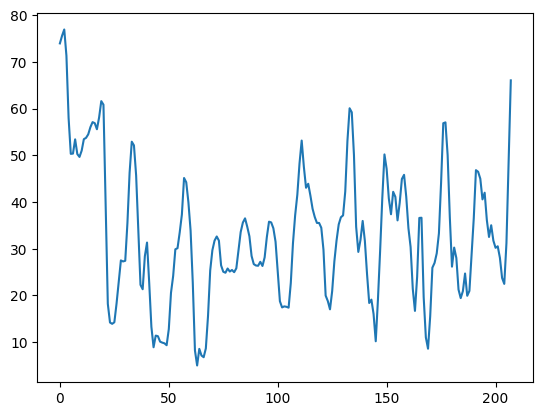

In [30]:
plt.plot(sum_pelak[0])
plt.show()

In [31]:
copy_pelak = crop_mask.copy()
copy_pelak = cv2.line(copy_pelak,(45,0),(45,90),(0,0,255),2)
cv2.imshow("car_plate_iran",copy_pelak)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
copy_crop_mask = crop_mask.copy()
xi = 0
xi1 = 0
xi2 = 0
flag = False
flag1 = False
for i in sum_pelak[0]:
    xi+=1

    if i > 30 and flag == True and flag1 == False:
        flag1 = True

    if i < 23:
        copy_crop_mask = cv2.line(copy_crop_mask,(xi,0),(xi,80),(0,0,0),1)
        if flag == False:
            xi1 = xi
        if flag1 == True:
            xi2 = xi

            flag = False
            flag1 = False
            img_crop = crop_mask[:,xi1:xi2]
            x_crop = np.empty((0,512))
            img_crop_1 = cv2.resize(img_crop,(16,32))
            #img_crop_2 = cv2.cvtColor(img_crop_1,cv2.COLOR_BGR2GRAY)
            img_crop_3 = img_crop_1.flatten()
            x_crop = np.append(x_crop,[img_crop_3],axis=0)
            pred_crop = model.predict(x_crop)
            print(pred_crop,end="")

            cv2.imshow("car",img_crop)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

            xi1 = xi2

        flag = True

cv2.imshow("pelak",copy_crop_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

[1.][9.][3.][7.][8.][4.][1.][1.][4.][6.]